In [1]:
# Import all necessary libraries and packages
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import re
import nltk
import statistics

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
!pip install lexicalrichness
from lexicalrichness import LexicalRichness
import re, itertools
import nltk
from nltk.corpus import stopwords

C:\Users\Sid\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Sid\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-

You should consider upgrading via the 'c:\users\sid\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv("C:/Users/Sid/Downloads/Final-Practicum-Dataset.csv")

In [3]:
Tfidf_vect = TfidfVectorizer(ngram_range = (1,2))
tfidfconverter = Tfidf_vect.fit_transform(data['Cleaned Comment'])
tfIdf_scores = (tfidfconverter.toarray())

In [4]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(tfIdf_scores,data['Intention'],test_size=0.2)

In [ ]:
#Linear SVC
LSVM = LinearSVC()
modellsvm = LSVM.fit(Train_X,Train_Y)
predictions_SVM = modellsvm.predict(Test_X)
print("Linear SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("Linear SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y)*100)
print("Linear SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y)*100)
print("Linear SVM F1 Score -> ",f1_score(predictions_SVM, Test_Y)*100)
print("Linear SVM Cross Validation Score -> ",cross_val_score(modellsvm, Train_X,Train_Y, cv = 10).mean() * 100)

In [ ]:
import seaborn as sns
print ('Confusion Matrix :')
results = confusion_matrix(Test_Y, predictions_SVM) 
print(results) 
print ('Classification Report:')
print (classification_report(Test_Y, predictions_SVM) )
sns.heatmap(results, annot=True, cmap='Blues', fmt='g')

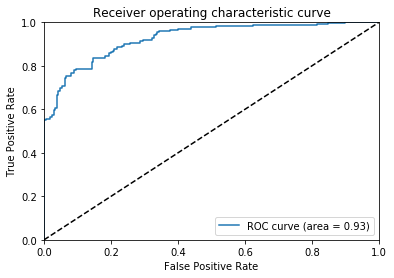

In [6]:
from sklearn.metrics import roc_curve, auc
import pylab as pl
LSVM = LinearSVC()
LSVM.fit(Train_X,Train_Y)
probas_ = LSVM._predict_proba_lr(Test_X)
fpr, tpr, thresholds = roc_curve(Test_Y, probas_[:, 1])
roc_auc = auc(fpr, tpr)
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic curve')
pl.legend(loc="lower right")
pl.show()

In [ ]:
#LOGISTIC REGRESSION
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
modellr = lr.fit(Train_X, Train_Y)
predictions_lr = modellr.predict(Test_X)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_lr, Test_Y)*100)
print("Logistic Regression Precision Score -> ",precision_score(predictions_lr, Test_Y)*100)
print("Logistic Regression Recall Score -> ",recall_score(predictions_lr, Test_Y)*100)
print("Logistic Regression F1 Score -> ",f1_score(predictions_lr, Test_Y)*100)
print("Logistic Regression Cross Validation Score -> ",cross_val_score(modellr, Train_X,Train_Y, cv = 10).mean() * 100)

In [ ]:
#SVM
SVM = SVC(kernel='linear')
modelsvm = SVM.fit(Train_X,Train_Y)
predictions_SVM = modelsvm.predict(Test_X)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y)*100)
print("SVM F1 Score -> ",f1_score(predictions_SVM, Test_Y)*100)
print("SVM Cross Validation Score -> ",cross_val_score(modelsvm, Train_X,Train_Y, cv = 10).mean() * 100)

In [ ]:
#RANDOM FOREST
rf = RandomForestClassifier(n_estimators=950) #explore parameters
modelrf = rf.fit(Train_X, Train_Y)
predictions_rf = modelrf.predict(Test_X)
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_rf, Test_Y)*100)
print("Random Forest Precision Score -> ",precision_score(predictions_rf, Test_Y)*100)
print("Random Forest Recall Score -> ",recall_score(predictions_rf, Test_Y)*100)
print("Random Forest F1 Score -> ",f1_score(predictions_rf, Test_Y)*100)
print("Random Forest Cross Validation Score -> ",cross_val_score(modelrf, Train_X,Train_Y, cv = 10).mean() * 100)

In [ ]:
#Naive Bayes
Naive = naive_bayes.MultinomialNB()
modelnb = Naive.fit(Train_X,Train_Y)
predictions_NB = modelnb.predict(Test_X)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Precision Score -> ",precision_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Recall Score -> ",recall_score(predictions_NB, Test_Y)*100)
print("Naive Bayes F1 Score -> ",f1_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Cross Validation Score -> ",cross_val_score(modelnb, Train_X,Train_Y, cv = 10).mean() * 100)

In [ ]:
#Stochastic Gradient Descent - SVM
SGD = SGDClassifier(loss="hinge", max_iter=5)
modellsgd = SGD.fit(Train_X,Train_Y)
predictions_SGD = modellsgd.predict(Test_X)
print("SGD Accuracy Score -> ",accuracy_score(predictions_SGD, Test_Y)*100)
print("SGD Precision Score -> ",precision_score(predictions_SGD, Test_Y)*100)
print("SGD Recall Score -> ",recall_score(predictions_SGD, Test_Y)*100)
print("SGD F1 Score -> ",f1_score(predictions_SGD, Test_Y)*100)
print("SGD Cross Validation Score -> ",cross_val_score(modellsgd, Train_X,Train_Y, cv = 10).mean() * 100)

In [ ]:
#Stochastic Gradient Descent - LR
SGD = SGDClassifier(loss="log", max_iter=5)
modellsgd = SGD.fit(Train_X,Train_Y)
predictions_SGD = modellsgd.predict(Test_X)
print("SGD Accuracy Score -> ",accuracy_score(predictions_SGD, Test_Y)*100)
print("SGD Precision Score -> ",precision_score(predictions_SGD, Test_Y)*100)
print("SGD Recall Score -> ",recall_score(predictions_SGD, Test_Y)*100)
print("SGD F1 Score -> ",f1_score(predictions_SGD, Test_Y)*100)
print("SGD Cross Validation Score -> ",cross_val_score(modellsgd, Train_X,Train_Y, cv = 10).mean() * 100)